In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import time
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
rng = numpy.random

In [26]:
# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 50

In [27]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
batch_size = 1


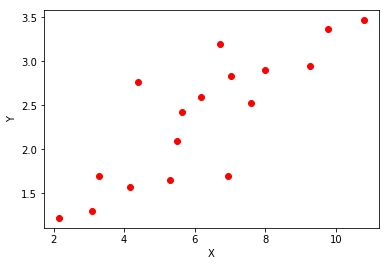

In [28]:
#show data
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.xlabel('X')
plt.ylabel('Y')

In [37]:
tf.reset_default_graph()

# define the input and output by tf.placeholder
X = tf.placeholder("float")
Y = tf.placeholder("float")

# define the model parameters by tf.Variable
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error loss
loss = tf.losses.mean_squared_error(pred,Y)

# Gradient descent optimizer
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 loss= 0.444443822 W= 0.46224645 b= -0.7996302
Epoch: 0100 loss= 0.237902671 W= 0.42063576 b= -0.4917235
Epoch: 0150 loss= 0.117740810 W= 0.38700098 b= -0.24283682
Epoch: 0200 loss= 0.051182397 W= 0.3598134 b= -0.041656807
Epoch: 0250 loss= 0.017356552 W= 0.33783707 b= 0.120960854
Epoch: 0300 loss= 0.003065306 W= 0.32007325 b= 0.25240776
Epoch: 0350 loss= 0.000040617 W= 0.3057144 b= 0.35865855
Epoch: 0400 loss= 0.003167185 W= 0.29410788 b= 0.44454327
Epoch: 0450 loss= 0.009334750 W= 0.28472605 b= 0.5139657
Epoch: 0500 loss= 0.016698735 W= 0.27714252 b= 0.5700818
Epoch: 0550 loss= 0.024205076 W= 0.27101275 b= 0.6154403
Epoch: 0600 loss= 0.031287968 W= 0.26605794 b= 0.65210444
Epoch: 0650 loss= 0.037676625 W= 0.2620528 b= 0.68174094
Epoch: 0700 loss= 0.043274194 W= 0.2588154 b= 0.70569676
Epoch: 0750 loss= 0.048082255 W= 0.2561985 b= 0.72506124
Epoch: 0800 loss= 0.052153651 W= 0.25408322 b= 0.7407138
Epoch: 0850 loss= 0.055565566 W= 0.25237337 b= 0.753366
Epoch: 0900 loss= 0.0

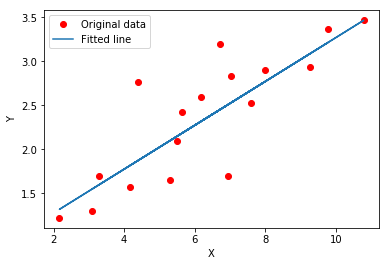

In [41]:
# Start training
with tf.Session() as sess:
    t_start = time.time()
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(train_op, feed_dict={X: x, Y: y})
 
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            loss_np = sess.run(loss, feed_dict={X: x, Y:y})
            print "Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(loss_np), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished, spend time: {}!".format(time.time()-t_start)
    training_cost = sess.run(loss, feed_dict={X: train_X, Y: train_Y})
    print "Training loss=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [ ]:
# assemble a graph
tf.reset_default_graph()
a = tf.Variable(1,name='a',trainable=True)
b = tf.constant(2,name='b')
c = a+b
assign = tf.assign(a,5)

# execute a graph
#print(tf.global_variables_initializer())
assign_list = []
c_list = []
with tf.Session() as sess:
    for _ in range(1500):
        sess.run(tf.global_variables_initializer())
        temp = sess.run([assign,c])
        assign_list.append(temp[0])
        c_list.append(temp[1])
    print(set(assign_list),set(c_list))